<a href="https://colab.research.google.com/github/kaushal1017/ML-PROJECTS/blob/main/HomePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Homestay Price Prediction Model

## Project Objective:

### To develop a predictive model using machine learning techniques, specifically linear regression, that accurately estimates the price of homestays based on relevant features extracted from Airbnb data.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

## Importing the data

In [32]:
df= pd.read_excel("/content/drive/MyDrive/dataset/Air_BNB.xlsx")
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [33]:
df.drop("id",axis=1,inplace=True)
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [34]:
print("The number of columns is",df.shape[1])
print("The number of rows is",df.shape[0])

The number of columns is 10
The number of rows is 74111


In [35]:
df.head(1)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635


In [36]:
df.tail(1)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74110,Entire home/apt,4.0,1.0,moderate,0.0,f,96.0,1.0,2.0,4.85203


##Understand the data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [38]:
# Summary statistics for numerical columns
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [39]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [40]:
print("Numbers of room types=",df['room_type'].nunique())

Numbers of room types= 3


In [41]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [42]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,41308
Private room,30635
Shared room,2163


In [43]:
df.head(1)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635


In [44]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [45]:
for column in df.columns:
  if df[column].dtype=="object":
    print(column.upper(),':',df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

ROOM_TYPE : 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

CANCELLATION_POLICY : 3

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

INSTANT_BOOKABLE : 2

instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [46]:
# create a copy of orignal dataframe
df2= df.copy()

In [47]:
df2.drop_duplicates(inplace=True)

In [48]:
df2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [49]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [50]:
df2.isnull().sum()

,0
room_type,5
accommodates,3
bathrooms,195
cancellation_policy,8
cleaning_fee,4
instant_bookable,0
review_scores_rating,10215
bedrooms,92
beds,125
log_price,0


In [51]:
df2.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [52]:
df2= pd.get_dummies(df2,columns= ['room_type','cancellation_policy','instant_bookable'],drop_first=True)

In [53]:
df2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,False,False,False,True,False
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,False,False,True,False,False
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,False,False,True,False,True
74109,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,False,False,False,True,True


## Null value treatment


In [54]:
df_mean= df2.copy()

In [55]:
for column in df_mean.columns:
  if df_mean[column].dtype != "object":
    mean= df_mean[column].mean()
    df_mean[column]= df_mean[column].fillna(mean)

In [56]:
df_mean.isnull().sum()

,0
accommodates,0
bathrooms,0
cleaning_fee,0
review_scores_rating,0
bedrooms,0
beds,0
log_price,0
room_type_Private room,0
room_type_Shared room,0
cancellation_policy_moderate,0


In [57]:
df_med= df2.copy()

In [58]:
for column in df_med.columns:
  if df_med[column].dtype != "object":
    median = df_med[column].median()
    df_med[column]= df_med[column].fillna(median)

In [59]:
df_med.isnull().sum()

,0
accommodates,0
bathrooms,0
cleaning_fee,0
review_scores_rating,0
bedrooms,0
beds,0
log_price,0
room_type_Private room,0
room_type_Shared room,0
cancellation_policy_moderate,0


In [60]:
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
df_knn= df2.copy()
df_imputed= imputer.fit_transform(df_knn)
df_knn= pd.DataFrame(df_imputed,columns=df_knn.columns)

In [61]:
df_knn

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.2,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54112,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
54113,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
54114,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
54115,2.0,1.0,1.0,96.6,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


## Outlier treatment

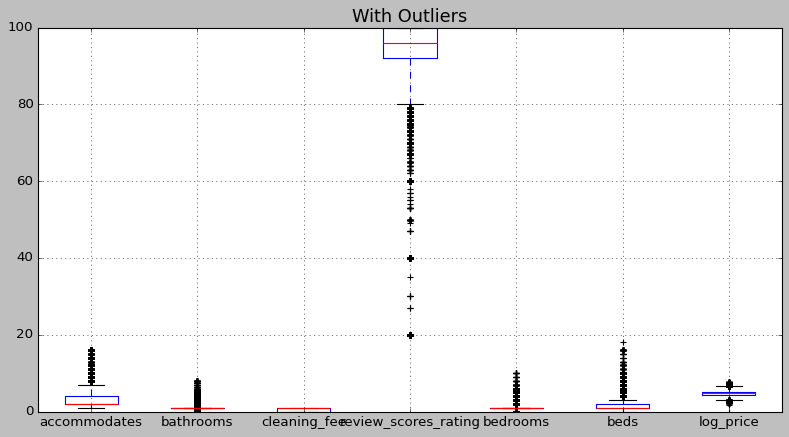

In [62]:
cont = df.select_dtypes(include=['number']).columns  # Select numerical columns
plt.figure(figsize=(12,6))
df[cont].boxplot()
plt.title("With Outliers",fontsize=16)
plt.show()


In [63]:
def remove_outlier(col):
  # Check if the column is boolean and convert to int if necessary
  if col.dtype == bool:
    col = col.astype(int)
  sorted(col)
  Q1,Q3= col.quantile([0.25,0.75])
  IQR= Q3-Q1
  lr= Q1-1.5*IQR
  ur= Q3+1.5*IQR
  return lr,ur

In [64]:
remove_outlier(df_mean['review_scores_rating'])

(83.0, 107.0)

In [65]:
df_mean_out= df_mean.copy()
df_med_out= df_med.copy()
df_knn_out= df_knn.copy()

In [66]:
for column in df_mean_out.columns:
  if df_mean_out[column].dtype != "object":
    lr,ur = remove_outlier(df_mean_out[column])
    df_mean_out[column]= np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
    df_mean_out[column]= np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

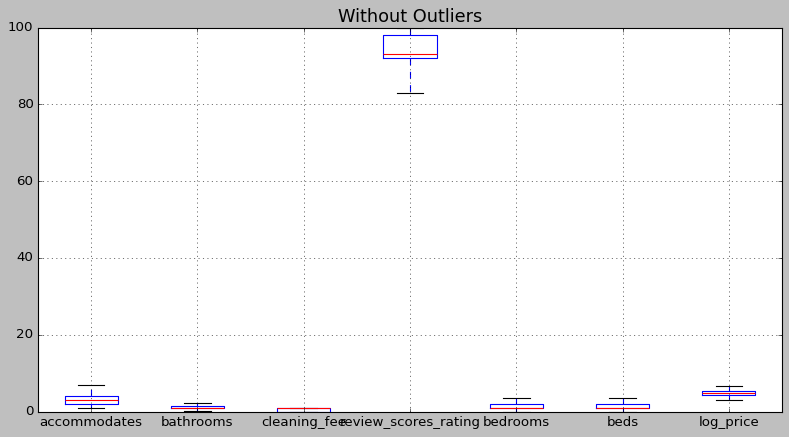

In [67]:
# boxplot without outlier
plt.figure(figsize=(12,6))
df_mean_out[cont].boxplot()
plt.title("Without Outliers",fontsize=16)
plt.show()

## Data Distribution

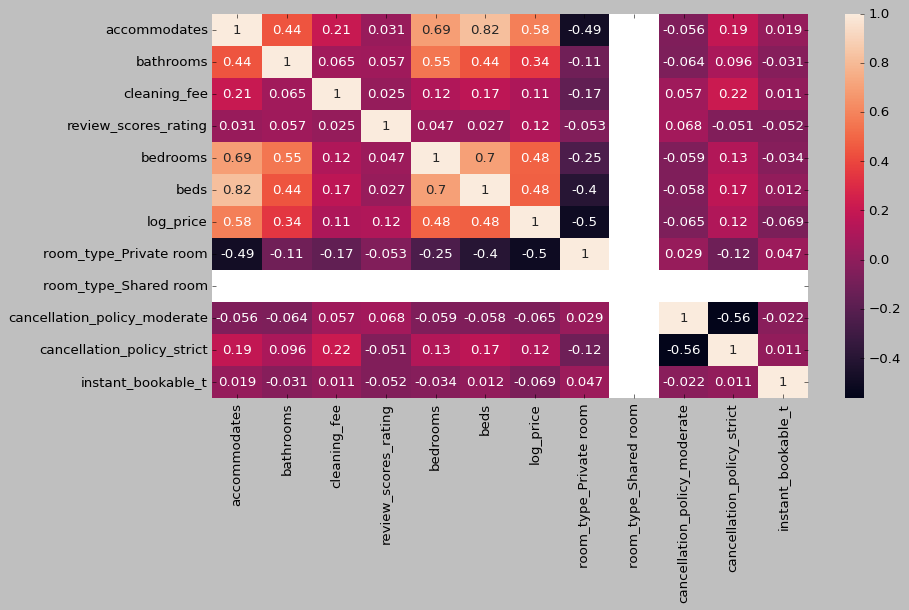

In [68]:
# correlation
plt.figure(figsize=(12,6))
sns.heatmap(df_mean_out.corr(),annot=True)
plt.show()

## train test split

In [69]:
# dependent(target variable) and independent varible
X= df_mean_out.drop('log_price',axis=1)

y= df_mean_out['log_price']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((43293, 11), (10824, 11), (43293,), (10824,))

## Linear regression model

In [72]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [73]:
## mean outlier treated
model.score(X_train,y_train)

0.444111002102237

In [74]:
## mean outlier not treated
X= df_mean.drop('log_price',axis=1)
y= df_mean['log_price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

model= LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.5033426703602051

In [75]:
# median outlier not treated
X= df_med.drop('log_price',axis=1)
y= df_med['log_price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

model= LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.5048266834704442

In [76]:
## median outlier treated
X= df_med_out.drop('log_price',axis=1)
y= df_med_out['log_price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

model= LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.5048266834704442

In [77]:
#knn outlier not treated
X= df_knn.drop('log_price',axis=1)
y= df_knn['log_price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

model= LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.5059732110679822

In [78]:
#knn outlier treated
X= df_knn_out.drop('log_price',axis=1)
y= df_knn_out['log_price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

model= LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.5059732110679822

## Model Summary

In [79]:
import statsmodels.api as sm

# Assuming X_train and y_train are already defined

# Add a constant to the independent variables
X_train_sm = sm.add_constant(X_train)

# Create and fit the OLS model
lr = sm.OLS(y_train, X_train_sm).fit()

# Print the model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     4030.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        01:15:21   Log-Likelihood:                -34126.
No. Observations:               43293   AIC:                         6.828e+04
Df Residuals:                   43281   BIC:                         6.838e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## visualization of the model

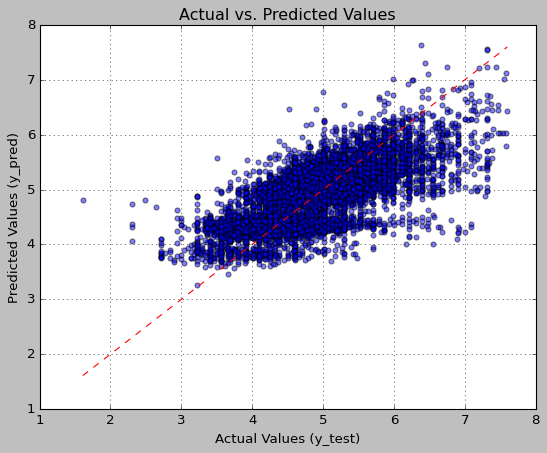

In [83]:
# visualization of the model

# Get predictions on the test set

y_pred = model.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.grid(True)
plt.show()

